In [1]:
# Import Libraries
import matplotlib 
matplotlib.use('TkAgg')
from matplotlib import rc
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from matplotlib.lines import Line2D


In [2]:
# Read WCS Values in Sexadecimal (x and y) and Degree (xx and yy)

x = np.loadtxt('x_wcs.txt', dtype='string')
xx = np.loadtxt('x_wcs_deg.txt')
print 'x[0]=',x[0]

y = np.loadtxt('y_wcs.txt', dtype='string')
yy = np.loadtxt('y_wcs_deg.txt')
print 'y[0]=',y[0]

x[0]= 01h37m08.528s
y[0]= +15:43:27.91


In [3]:
# Set the Xaxis Ticks value 

# xxx is Defines with the deg+min/60 for each ticks wanted. 
# In this case it is 01h36m30s with step of 10s until 01h37m
xxx = [(1./24.)*360.+(36./(60.*24.))*360.+(30./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(32./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(34./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(36./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(38./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(40./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(42./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(44./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(46./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(48./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(50./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(52./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(54./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(56./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(58./(3600.*24.))*360.,\
       (1./24.)*360.+(37./(60.*24.))*360.+(00./(3600.*24.))*360.,\
       (1./24.)*360.+(37./(60.*24.))*360.+(02./(3600.*24.))*360.,\
       (1./24.)*360.+(37./(60.*24.))*360.+(04./(3600.*24.))*360.,\
       (1./24.)*360.+(37./(60.*24.))*360.+(06./(3600.*24.))*360.,\
       (1./24.)*360.+(37./(60.*24.))*360.+(08./(3600.*24.))*360.]

# xxxx is the Ticks value in String to inclue the h:m:s
xxxx = ['36m30s','36m32s','36m34s','36m36s','36m38s','36m40s','36m42s','36m44s',\
      '36m46s','36m48s','36m50s','36m52s','36m54s','36m56s','36m58s','1h37m',\
      '37m02s','37m04s','37m06s','37m08s']
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
# xxxxx is the Array Position of the defined xxx Values in the Data WCS 
xxxxx = np.zeros(20)
for i in range(0,20) : 
    xxxxx[i]=np.where(xx == find_nearest(xx,xxx[i]))[0]


In [4]:
# Set the Yaxis Ticks value 

# yyy is Defines with the deg+min/60 for each ticks wanted. 
# In this case it is +15d44m with step of 2m until +15d54m
yyy = [15+(44./(60)),\
       15+(45./(60)),\
       15+(46./(60)),\
       15+(47./(60)),\
       15+(48./(60)),\
       15+(49./(60)),\
       15+(50./(60)),\
       15+(51./(60)),\
       15+(52./(60)),\
       15+(53./(60)),\
       15+(54./(60))]

# yyyy is the Ticks value in String to inclue the $\degree$ symbol
yyyy=['+15$\degree$44','+15$\degree$45',\
      '+15$\degree$46','+15$\degree$47',\
      '+15$\degree$48','+15$\degree$49',\
      '+15$\degree$50','+15$\degree$51',\
      '+15$\degree$52','+15$\degree$53','+15$\degree$54']

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
#yyyyy is the Array Position of the defined yyy Values in the Data WCS 
yyyyy = np.zeros(11)
for i in range(0,11) : 
    yyyyy[i]=np.where(yy == find_nearest(yy,yyy[i]))[0]


In [5]:
# Note for WCS overplot
# from astropy.wcs import WCS
# fits_file = 'NGC628_SN3.merged.tan.fits'
# hdu = fits.open(fits_file)[0]À
# wcs = WCS(hdu.header)
            #Not convenient for the Font modification...

In [6]:
# Read Centroid position of the Ha Peak 
regxy = np.loadtxt('Region_xy_centroid.reg')
regx = regxy[0:,0]
regy = regxy[0:,1]

In [7]:
# Read Fits Data and Data Header
ahdu_list = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.velocity.clean.shift.fits')
ahdu_list.info()
image_data = ahdu_list[0].data
ahdu_list.close()

ahdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list1.info()
aimage_data1 = ahdu_list1[0].data
ahdu_list1.close()

s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
image_data[(image_data > 695)] = 695
image_data[(image_data < 630)] = 630
image_data[np.where(aimage_data1 < 1.2e-18)] = 10000
image_data[(image_s == 1)] = 10000


Filename: NGC628_SN3_1.0.LineMaps.map.6563.velocity.clean.shift.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      43   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: stars.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   (2048, 2064)   float32   


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


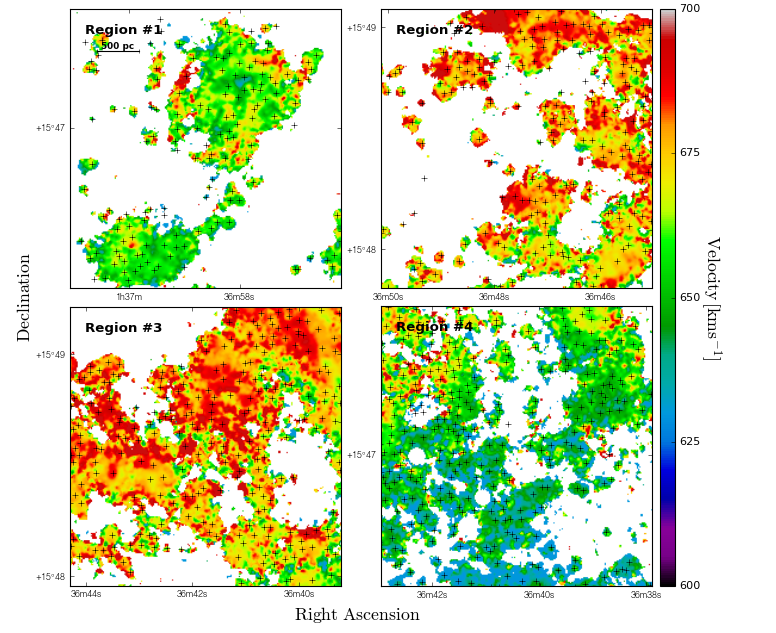

In [11]:
# Plot the Data 
%matplotlib nbagg

# Set the number of subplots
#nb_row = 3
#nb_col = 2
nb_row = 2
nb_col = 2
elem = [[str('') for i_test in range(0,nb_col)]\
                 for j_test in range(0,nb_row)]

# Creation of the frame with subplots
f, axarr = plt.subplots(nb_row, nb_col, figsize=(9.7,7.92))
f.subplots_adjust(hspace=0.04)
f.subplots_adjust(wspace=0.15)


# Choose X and Y labels

common_x = '$\mathrm{Right\,\,Ascension}$'
common_y = '$\mathrm{Declination}$'
matplotlib.rcParams.update({'font.size': 16.0})
    # and Position
f.text(0.46, 0.02, common_x, ha='center',size=16.0)
f.text(0.02, 0.53, common_y, va='center', rotation='vertical',size=16)

# Plot the Images
colorbarlim=[600,700]
a1 = axarr[0][0].imshow(image_data, cmap='nipy_spectral', clim=colorbarlim)
a2 = axarr[0][1].imshow(image_data, cmap='nipy_spectral', clim=colorbarlim)
a3 = axarr[1][0].imshow(image_data, cmap='nipy_spectral', clim=colorbarlim)
a4 = axarr[1][1].imshow(image_data, cmap='nipy_spectral', clim=colorbarlim)

# Plot the Color Scale

cbar_ax = f.add_axes([0.85,0.074,0.02,0.911])
cbar_obj = f.colorbar(a1, cax = cbar_ax)
cbar_obj.set_label('$\mathrm{Velocity\,[km s^{-1}]}$', rotation=270, fontsize=16, labelpad=20)
cbar_obj.set_ticks([600,625,650,675,700])
cbar_obj.ax.tick_params(labelsize=10)  

#1
xlow1 = 362
xmax1 = 590
ylow1 = 550
ymax1 = 785

#2
xlow2 = 862
xmax2 = 1090
ylow2 = 840
ymax2 = 1075

#3
xlow3 = 1122
xmax3 = 1350
ylow3 = 865
ymax3 = 1100

#4
xlow4 = 1182
xmax4 = 1410
ylow4 = 574
ymax4 = 810


# Plot the Predefined Ticks


xxxxx21=[X for X in list(xxxxx) if (X >= xlow1 and X <= xmax1)]
xxxxx22=[X for X in list(xxxxx) if (X >= xlow2 and X <= xmax2)]
xxxxx23=[X for X in list(xxxxx) if (X >= xlow3 and X <= xmax3)]
xxxxx24=[X for X in list(xxxxx) if (X >= xlow4 and X <= xmax4)]
xxxx21 = []
xxxx22 = []
xxxx23 = []
xxxx24 = []
for i in range(0,len(xxxxx21)):
    xxxx21.append(xxxx[np.where(xxxxx == np.array(xxxxx21[i]))[0][0]])
for i in range(0,len(xxxxx22)):
    xxxx22.append(xxxx[np.where(xxxxx == np.array(xxxxx22[i]))[0][0]])
for i in range(0,len(xxxxx23)):
    xxxx23.append(xxxx[np.where(xxxxx == np.array(xxxxx23[i]))[0][0]])
for i in range(0,len(xxxxx24)):
    xxxx24.append(xxxx[np.where(xxxxx == np.array(xxxxx24[i]))[0][0]])
    
yyyyy21=[Y for Y in list(yyyyy) if (Y >= ylow1 and Y <= ymax1)]
yyyyy22=[Y for Y in list(yyyyy) if (Y >= ylow2 and Y <= ymax2)]
yyyyy23=[Y for Y in list(yyyyy) if (Y >= ylow3 and Y <= ymax3)]
yyyyy24=[Y for Y in list(yyyyy) if (Y >= ylow4 and Y <= ymax4)]
yyyy21 = []
yyyy22 = []
yyyy23 = []
yyyy24 = []
for i in range(0,len(yyyyy21)):
    yyyy21.append(yyyy[np.where(yyyyy == np.array(yyyyy21[i]))[0][0]])
for i in range(0,len(yyyyy22)):
    yyyy22.append(yyyy[np.where(yyyyy == np.array(yyyyy22[i]))[0][0]])
for i in range(0,len(yyyyy23)):
    yyyy23.append(yyyy[np.where(yyyyy == np.array(yyyyy23[i]))[0][0]])
for i in range(0,len(yyyyy24)):
    yyyy24.append(yyyy[np.where(yyyyy == np.array(yyyyy24[i]))[0][0]])
    
    

a1.cmap.set_over('w')
a2.cmap.set_over('w')
a3.cmap.set_over('w')
a4.cmap.set_over('w')
a1.cmap.set_under('k')
a2.cmap.set_under('k')
a3.cmap.set_under('k')
a4.cmap.set_under('k')


# Plot the Images

a1 = axarr[0][0].imshow(image_data, cmap='nipy_spectral', clim=colorbarlim)
axarr[0][0].set_xlim(xlow1,xmax1)
axarr[0][0].set_ylim(ylow1,ymax1)
a2 = axarr[0][1].imshow(image_data, cmap='nipy_spectral', clim=colorbarlim)
axarr[0][1].set_xlim(xlow2,xmax2)
axarr[0][1].set_ylim(ylow2,ymax2)
a3 = axarr[1][0].imshow(image_data, cmap='nipy_spectral', clim=colorbarlim)
axarr[1][0].set_xlim(xlow3,xmax3)
axarr[1][0].set_ylim(ylow3,ymax3)
a4 = axarr[1][1].imshow(image_data, cmap='nipy_spectral', clim=colorbarlim)
axarr[1][1].set_xlim(xlow4,xmax4)
axarr[1][1].set_ylim(ylow4,ymax4)

    

# Plot the Predefined Ticks

axarr[0][0].set_xticks(xxxxx21)
axarr[0][0].set_xticklabels(xxxx21, fontsize=8, fontname='Helvetica')
axarr[0][1].set_xticks(xxxxx22)
axarr[0][1].set_xticklabels(xxxx22, fontsize=8, fontname='Helvetica')
axarr[1][0].set_xticks(xxxxx23)
axarr[1][0].set_xticklabels(xxxx23, fontsize=8, fontname='Helvetica')
axarr[1][1].set_xticks(xxxxx24)
axarr[1][1].set_xticklabels(xxxx24, fontsize=8, fontname='Helvetica')

axarr[0][0].set_yticks(yyyyy21)
axarr[0][0].set_yticklabels(yyyy21, fontsize=8, fontname='Helvetica')
axarr[0][1].set_yticks(yyyyy22)
axarr[0][1].set_yticklabels(yyyy22, fontsize=8, fontname='Helvetica')
axarr[1][0].set_yticks(yyyyy23)
axarr[1][0].set_yticklabels(yyyy23, fontsize=8, fontname='Helvetica')
axarr[1][1].set_yticks(yyyyy24)
axarr[1][1].set_yticklabels(yyyy24, fontsize=8, fontname='Helvetica')


# Plot the Ha Peaks Positions 
axarr[0][0].plot(regx, regy, '+k', markersize=5)
axarr[0][1].plot(regx, regy, '+k', markersize=5)
axarr[1][0].plot(regx, regy, '+k', markersize=5)
axarr[1][1].plot(regx, regy, '+k', markersize=5)

# Define the Scale of that_amount_of_pc Line Position
#that_amount_of_pc = 1000
that_amount_of_pc = 500
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow1 + (xmax1-xlow1) * 0.1
xlinemax = xlow1 + (xmax1-xlow1) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow1 + (ymax1-ylow1) * 0.85
ylinemax = ylow1 + (ymax1-ylow1) * 0.85


# Plot the Scale of that_amount_of_pc Line Position
axarr[0][0].add_line(Line2D([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker='|', markersize=3))
axarr[0][0].annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.0025*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 8, fontname = 'Times', color = 'k',fontweight='bold')




# Modification of the Plot area and the Axis Labels
f.subplots_adjust(top=0.99)
f.subplots_adjust(bottom=0.069)
f.subplots_adjust(left=0.09)
f.subplots_adjust(right=0.84)

# Add white contour on each images
for i in range(0,2):
    for j in range(0,2):
        for z in ['bottom', 'top', 'left', 'right']:
            axarr[i][j].spines[z].set_color('k')
            axarr[i][j].spines[z].set_linewidth(1)
            
# Add annotation
elem[0][0] = 'Region #1'
elem[0][1] = 'Region #2'
elem[1][0] = 'Region #3'
elem[1][1] = 'Region #4'

for i_row in range(0,nb_row):
    for i_col in range(0,nb_col):
        axarr[i_row][i_col].annotate(elem[i_row][i_col],xy=(0.34,0.9),xycoords='axes fraction',\
            fontsize=12.0, horizontalalignment='right',verticalalignment='bottom', color='k', fontweight='bold')

In [9]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_velocity_regions.eps')
#plt.savefig('test.png', dpi=1000)